##### import sys
sys.path.append('../ch03') 
sys.path.append('../') 

from vectors import *
from draw2d import *

import numpy as np

In [3]:
def v_function(a, v0):
    def v(t):
        return add(v0, scale(t,a))
    return v

def eulers_method(s0, v, t0, dt, n):

    positions = [s0]

    position = s0
    velocity = v(t0)

    for i in range(0,n):
        
        velocity = v(t0+i*dt)
        ds = scale(dt,velocity)
        
        position = add(position, ds)
        positions.append(position)

    return positions
        
approx5 = eulers_method((0,0), v_function((0,.2), (1,0)), 0, 2, 5)
approx10 = eulers_method((0,0), v_function((0,.2), (1,0)), 0, 1, 10)
approx100 = eulers_method((0,0), v_function((0,.2), (1,0)), 0, .1, 100)

def pairs(lst):
    return list(zip(lst[:-1],lst[1:]))

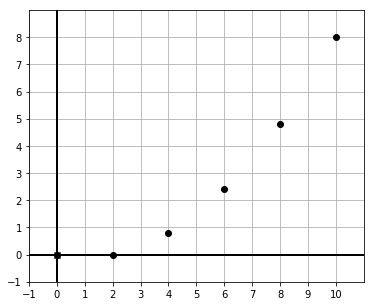

In [4]:
t = 0
s = (0,0)
v = (1,0)
a = (0,0.2)

dt = 2
steps = 5

positions = [s]
for _ in range(0,5):
    t += 2
    s = add(s,scale(dt,v))
    v = add(v,scale(dt,a))
    positions.append(s)

from draw2d import *
draw2d(Points2D(*positions))

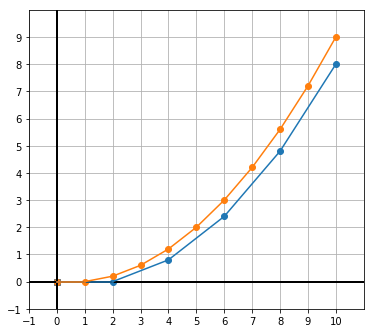

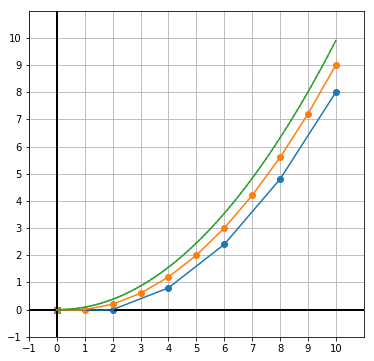

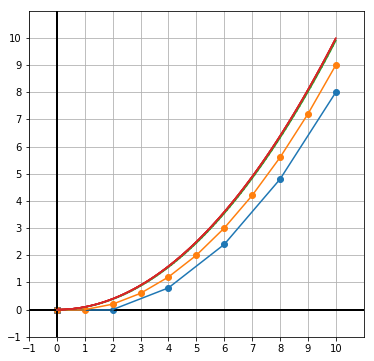

In [5]:
def eulers_method(s0,v0,a,total_time,step_count):
    positions = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        s = add(s,scale(dt,v))
        v = add(v,scale(dt,a))
        positions.append(s)
    return positions

approx5 = eulers_method((0,0),(1,0),(0,0.2),10,5)
approx10 = eulers_method((0,0),(1,0),(0,0.2),10,10)
approx100 = eulers_method((0,0),(1,0),(0,0.2),10,100)
approx1000 = eulers_method((0,0),(1,0),(0,0.2),10,1000)

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)]
    )

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    save_as='../3eulers.svg'
    )

draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    *[Segment2D(t,h,color='C3') for (h,t) in pairs(approx1000)],
    )


In [6]:
approx100[-1]

(9.99999999999998, 9.900000000000006)

In [7]:
approx1000[-1]

(9.999999999999831, 9.990000000000007)

In [8]:
eulers_method(0,(0,0),(1,0),(0,0.2),0.0001,100000)[-1]

TypeError: eulers_method() takes 5 positional arguments but 6 were given

Text(0.5,0,'Year')

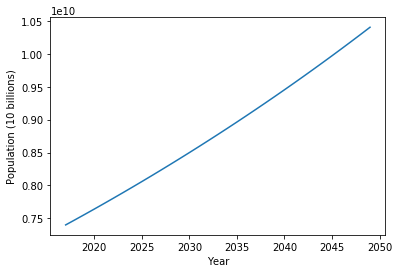

In [9]:
population = 7.4E9

populations = [population]
for year in range(2018,2050):
    population += (0.0107 * population)
    populations.append(population)
    
plt.plot(range(2017,2050), populations)
plt.ylabel('Population (10 billions)')
plt.xlabel('Year')


In [10]:
populations[-1]

10402655638.0278

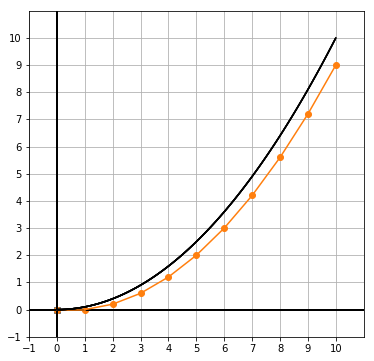

In [11]:
exact = [(t,0.1*t**2) for t in np.linspace(0,10,1000)]
draw2d(
#     Points2D(*approx5, color='C0'),
#     *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='k') for (h,t) in pairs(exact)],
    save_as='../3eulers.svg'
    )

In [12]:
from vectors import *
def find_velocity(t1,s1,t2,s2):
    elapsed_time = t2 - t1
    return scale(1/elapsed_time, subtract(s2,s1))

In [13]:
find_velocity(2,(-3,3),4,(1,5))

(2.0, 1.0)

In [14]:
time = 0.75
speed = 45
distance = speed * time
distance

33.75

In [53]:
def trajectory(ss, points=True, color='C0'):
    for (h,t) in pairs(ss):
        yield Segment2D(t,h,color=color)
    if points:
        yield Points2D(*ss,color=color)

def plot_trajectory(s0,v0,a,t,n,**kwargs):
    draw2d(*[Segment2D(t,h,color='C0') for (h,t) in pairs(eulers_method(s0,v0,a,t,n))], **kwargs)

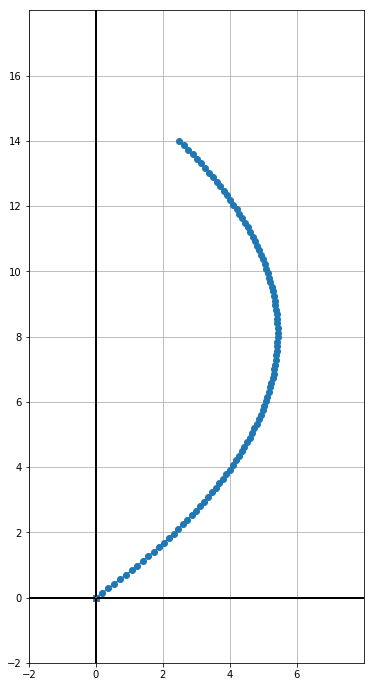

In [54]:
draw2d(*trajectory(eulers_method((0,0),(4,3),(-1.5,0),4.67,100)), grid=(2,2))

In [43]:
def eulers_method_overapprox(s0,v0,a,total_time,step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        v = add(v,scale(dt,a))
        s = add(s,scale(dt,v))
        trajectory.append(s)
    return trajectory

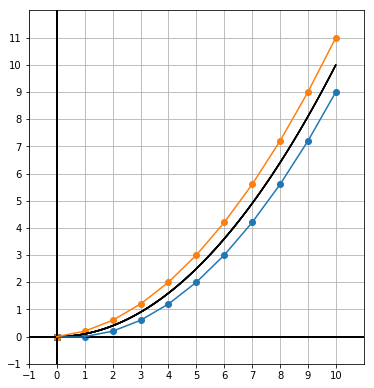

In [44]:
under = eulers_method((0,0),(1,0),(0,0.2),10,10)
over = eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10)
draw2d(
    *[Segment2D(t,h,color='k') for (h,t) in pairs(exact)],
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(under)],
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(over)],
    Points2D(*under,color='C0'),
    Points2D(*over,color='C1')
)

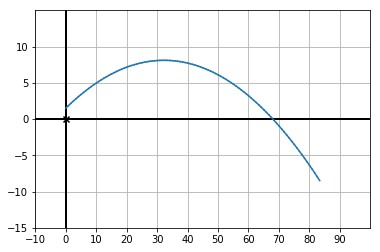

In [84]:
from math import pi,sin,cos
def baseball_trajectory(degrees):
    radians = degrees * pi/180
    s0 = (0,1.5)
    v0 = (30*cos(radians),30*sin(radians))
    a = (0,-9.81)
    return eulers_method(s0,v0,a,3,100)
draw2d(*trajectory(baseball_trajectory(22), points=False), grid=(10,5), nice_aspect_ratio=False)

In [79]:
def baseball_trajectory(degrees):
    radians = degrees * pi/180
    s0 = (0,0)
    v0 = (30*cos(radians),30*sin(radians))
    a = (0,-9.81)
    return [(x,y) for (x,y) in eulers_method(s0,v0,a,10,1000) if y>=0]


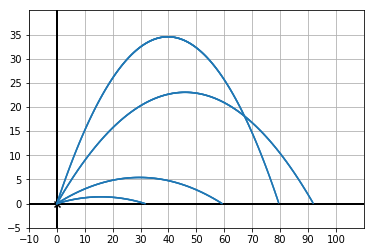

In [80]:
draw2d(
    *trajectory(baseball_trajectory(10), points=False),
    *trajectory(baseball_trajectory(20), points=False),
    *trajectory(baseball_trajectory(45), points=False),
    *trajectory(baseball_trajectory(60), points=False), 
    grid=(10,5), nice_aspect_ratio=False
)

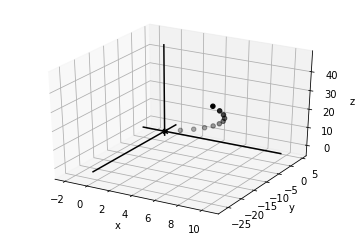

In [96]:
from draw3d import *
traj3d = eulers_method((0,0,0), (1,2,0), (0,-1,1), 10, 10)
draw3d(
    Points3D(*traj3d)
)

In [101]:
eulers_method((0,0,0), (1,2,0), (0,-1,1), 10, 1000)[-1]

(9.999999999999831, -29.949999999999644, 49.94999999999933)

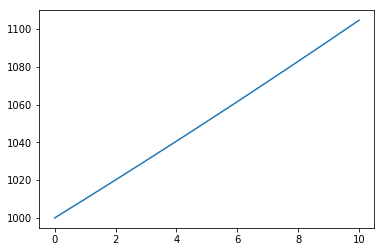

In [106]:
balance = 1000
interest = 0.01
years = 10
step_count = 10
dt = years / step_count
balances = [balance]

for _ in range(0,step_count):
    balance += interest * balance * dt
    balances.append(balance)

plt.plot(range(0,11), balances)

In [107]:
balances[-1]

1104.6221254112043

In [110]:
def compound(principal, interest, years, step_count):
    balance = principal
    dt = years / step_count
    balances = [balance]

    for _ in range(0,step_count):
        balance += interest * balance * dt
    return balance

In [113]:
compound(1000,0.01,10,10)

1104.6221254112043

In [118]:
compound(1000,0.01,10,12000)

1105.1704575904116

In [119]:
from math import exp

In [123]:
1000 * exp(0.1)

1105.1709180756477

In [136]:
from vectors import distance
def euler_error(step_count):
    approx = eulers_method((0,0),(1,0),(0,0.2),10,step_count)[-1]
    return length(subtract((10,10), approx))

Text(0.5,0,"Number of Euler's method steps")

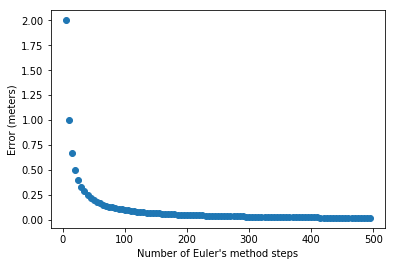

In [143]:
ns = range(5,500,5)
ds = [euler_error(n) for n in ns]
plt.plot(ns,ds,'o')
plt.ylabel('Error (meters)')
plt.xlabel('Number of Euler\'s method steps')